['UstIshim', 'Oase1', 'Kostenki14', 'GoyetQ116-1', 'Sunghir', 'Vestonice16', 'Yana_old', 'Yana_old2', 'Malta1', 'AfontovaGora3', 'ElMiron', 'Villabruna', 'Bichon', 'Satsurblia', 'Kotias', 'Karelia', 'Motala12', 'Loschbour', 'LaBrana1', 'Hungarian.KO1', 'Stuttgart', 'French', 'Sardinian', 'Natufian']


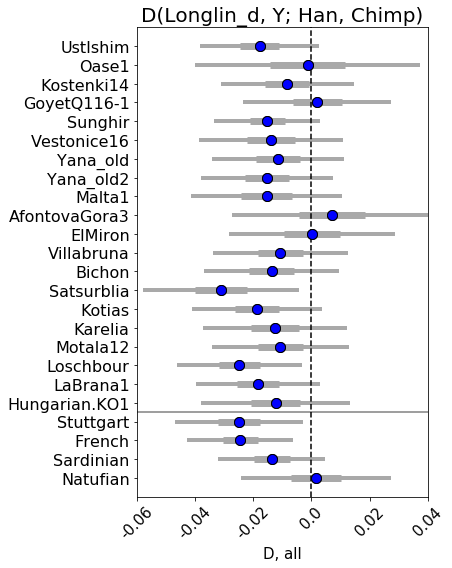

['UstIshim', 'Oase1', 'Kostenki14', 'GoyetQ116-1', 'Sunghir', 'Vestonice16', 'Yana_old', 'Yana_old2', 'Malta1', 'AfontovaGora3', 'ElMiron', 'Villabruna', 'Bichon', 'Satsurblia', 'Kotias', 'Karelia', 'Motala12', 'Loschbour', 'LaBrana1', 'Hungarian.KO1', 'Stuttgart', 'French', 'Sardinian', 'Natufian']


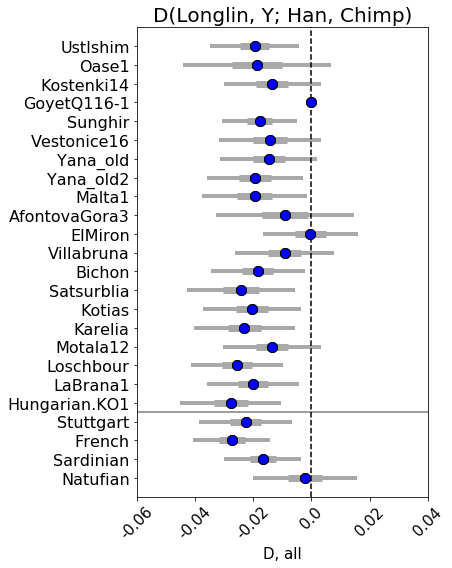

['UstIshim', 'Oase1', 'Kostenki14', 'GoyetQ116-1', 'Sunghir', 'Vestonice16', 'Yana_old', 'Yana_old2', 'Malta1', 'AfontovaGora3', 'ElMiron', 'Villabruna', 'Bichon', 'Satsurblia', 'Kotias', 'Karelia', 'Motala12', 'Loschbour', 'LaBrana1', 'Hungarian.KO1', 'Stuttgart', 'French', 'Sardinian', 'Natufian']


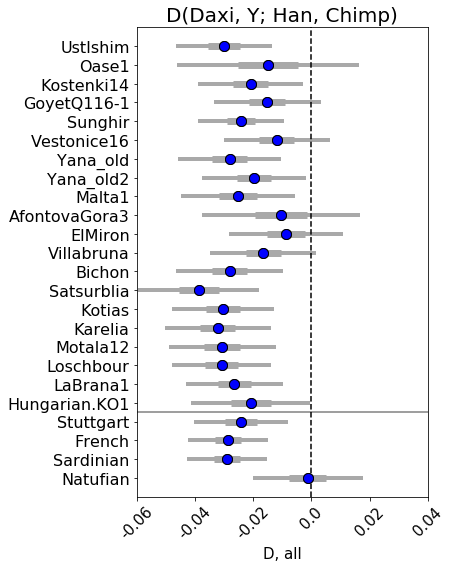

In [22]:
#%%writefile /mnt/solexa/mel_yang/2.2_neolithic/Dstats/UPA9/makeDfig_EUP.py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import matplotlib.patches as mpatches
import plotting_funcs as pf
import sys



pD = "/mnt/solexa/mel_yang/2.2_neolithic/Dstats/UPA9/"
fhs = ["UPA_all9"]
outs = ['Mbuti']

easpops=["Oroqen","Daur","Hezhen","Xibo","Japanese","Korean",
        "Tu","Han","Tujia","Miao","Yi","She","Naxi","Atayal",
        "Ami","Lahu","Dai","Kinh","Burmese","Thai","Cambodian"] ##BY LATITUDE
easpops=['UstIshim','Oase1','Kostenki14','GoyetQ116-1','Sunghir','Vestonice16','Yana_old','Yana_old2',
                  'Malta1','AfontovaGora3','ElMiron','Villabruna','Bichon','Satsurblia','Kotias','Karelia',
                  'Motala12','Loschbour','LaBrana1','Hungarian.KO1','Stuttgart','French','Sardinian','Natufian']

wantedpops = easpops[::-1]
wantedcolors = ['blue']*len(wantedpops)

#wantedpops[-1] = 'Tianyuan'
mynames=wantedpops[:]
#mynames[mynames.index('Clovis')]='Anzick-1'
#mynames[mynames.index('TY')]='Tianyuan'
fh="UPA_all9"
tv="transv"
outs=["Chimp"] #,"Chimp"]
tvs=["all"] #,"transv"]
fixedpop="Natufian" #sys.argv[1]
#for fixedpop in ["Kostenki14","Vestonice16","GoyetQ116-1","Sunghir","Natufian"]:
for fixedpop in ["Longlin","Longlin_com","Daxi"]:
    mysets=["%s_ASN_EUP_%s" % (fixedpop,out) for out in outs]

    mytwoeurs = [['Han'],] #[[sys.argv[2],]] #
    for myeurs in mytwoeurs:
        fig = plt.figure(figsize=(15,8))
        for mysetind,myset in enumerate(mysets):
            #myset = "aEAS_ASN_Natufian_%s" % out
            tv=tvs[mysetind]
            colors = ['red','blue','brown','black','orange']

            myxmins = [-0.06]*len(myeurs)
            myxmaxs = [0.04]*len(myeurs)

            for mysubplot,myeur in enumerate(myeurs):
                myeurname=myeur
                if myeur=="LiangDaoChineseNeolithic": myeurname="LiangDao"
                elif myeur=="BoshanChineseNeolithic": myeurname="Boshan"
                elif myeur=="Xinyi_other": myeurname="Xinyi2"
                elif myeur=="Longlin_com": myeurname="Longlin2"
                elif myeur=="Boisman_MN": myeurname="Boisman"
                elif myeur=="Jomon": myeurname="Sanheyi"
                if fixedpop=="Longlin": fixedpopname="Longlin_d"
                elif fixedpop=="Longlin_com": fixedpopname="Longlin"
                else: fixedpopname=fixedpop
                ax1=fig.add_subplot(1,3,mysetind+1)
                mylabel="D(%s, Y; %s, %s)" % (fixedpopname,myeurname,outs[mysetind])    
                mycond = True if 'tp' in myset else False

                myZary,mypops2,mypops1 = pf.mkDZary(pD+fh+".D."+tv+"."+myset+'.Zmat',mycond)
                myDary,mypops2,mypops1 = pf.mkDZary(pD+fh+".D."+tv+"."+myset+'.Dmat',mycond)

                myDary=myDary
                mySEary=myDary/myZary
                print mypops2
                goodpops2 = [mypops2.index(i) for i in wantedpops]
                goodpops1 = mypops1.index(myeur)

                myys = np.array(range(len(goodpops2)))
                tyD = myDary[goodpops1,goodpops2]
                tySE = mySEary[goodpops1,goodpops2]
                for i in range(len(wantedpops)):
                    #print tyD[i]
                    ax1.errorbar(tyD[i],myys[i],xerr=tySE[i],color=wantedcolors[i],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
                    ax1.errorbar(tyD[i],myys[i],xerr=3*tySE[i],color=wantedcolors[i],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
                    ax1.plot(tyD[i],myys[i],'.')
                ax1.set_yticks(myys) #,rotation=45)
                if mysubplot==0:
                    ax1.set_yticklabels(mynames,fontsize=16)
                else: 
                    ax1.set_yticklabels(['']*len(wantedpops),fontsize=17)
                ax1.set_ylim(-1,len(goodpops2))
                ax1.set_xlim(myxmins[mysubplot],myxmaxs[mysubplot])

                xlabel = ax1.get_xticks().tolist()
                ax1.set_xticklabels(xlabel,rotation=45,fontsize=15)

                ax1.set_title(mylabel,fontsize=20)

                ax1.axvline(x=0, ls='dashed', c='black')
                for myline in [3.5]:
                    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5)

                ax1.set_xlabel("D, %s" % tv,fontsize=15)

            fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=None)
        plt.tight_layout()
        #plt.savefig(pD+fh+'.Dfig.%s_%s_EUP_Out' % (fixedpop,myeur)+'.png',bbox_inches='tight')
        plt.show()            

/home/mel_yang/.local/lib/python2.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in divide


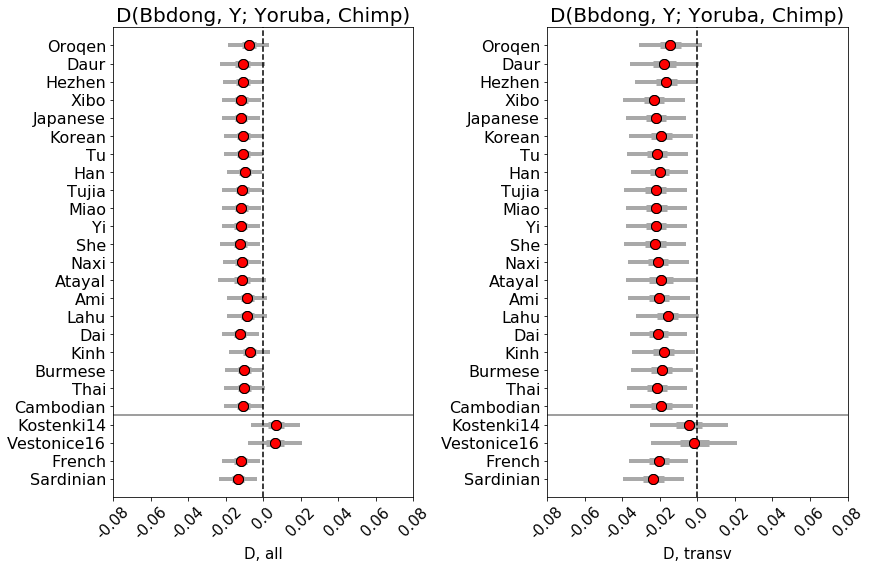

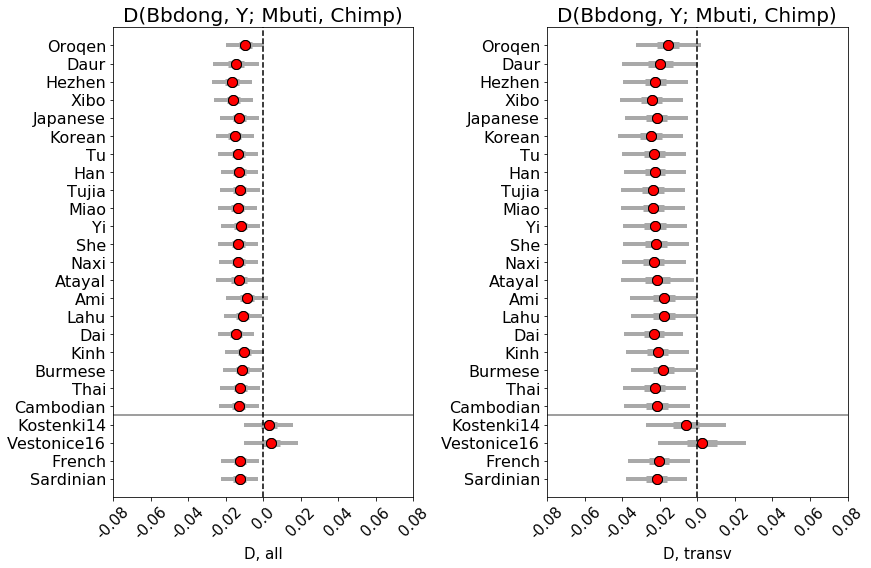

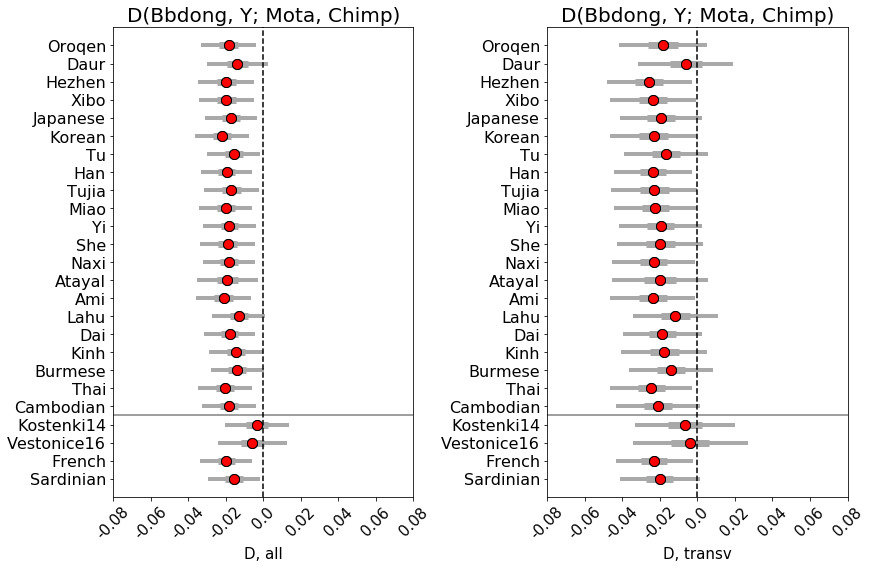

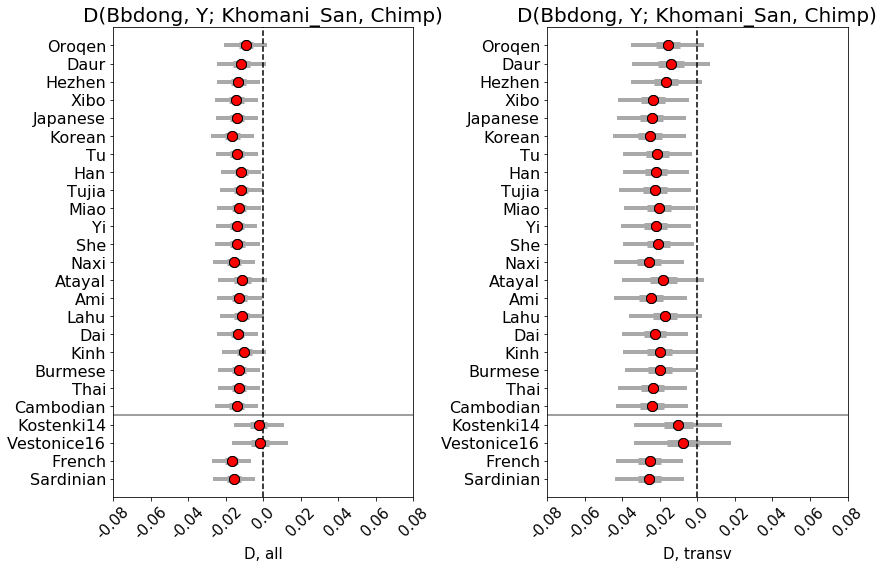

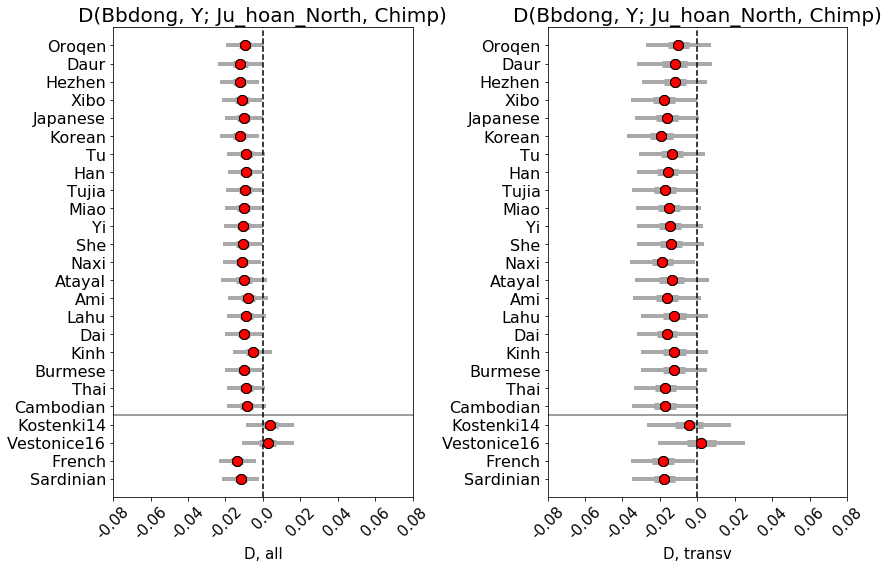

In [116]:
#%%writefile /mnt/solexa/mel_yang/2.2_neolithic/Dstats/UPA9/makeDfig_EUP.py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import matplotlib.patches as mpatches
import plotting_funcs as pf
import sys



pD = "/mnt/solexa/mel_yang/2.2_neolithic/Dstats/UPA9/"
fhs = ["UPA_all9"]
outs = ['Mbuti']

easpops=["Oroqen","Daur","Hezhen","Xibo","Japanese","Korean",
        "Tu","Han","Tujia","Miao","Yi","She","Naxi","Atayal",
        "Ami","Lahu","Dai","Kinh","Burmese","Thai","Cambodian",
     "Kostenki14","Vestonice16","French","Sardinian"] ##BY LATITUDE
namers = []
wantedpops = namers[::-1]+easpops[::-1]
wantedcolors = ['blue']*len(namers)+['red']*len(easpops)
#wantedpops[-1] = 'Tianyuan'
mynames=wantedpops[:]
#mynames[mynames.index('Clovis')]='Anzick-1'
#mynames[mynames.index('TY')]='Tianyuan'
fh="UPA_all9"
tv="transv"
outs=["Mbuti","Mbuti","Chimp"]
tvs=["all","transv","all"]
outs=["Chimp","Chimp"]
tvs=["all","transv"]
fixedpop="Natufian" #sys.argv[1]
#for fixedpop in ["Kostenki14","Vestonice16","GoyetQ116-1","Sunghir","Natufian"]:
for fixedpop in ["Yoruba","Mbuti","Mota","Khomani_San","Ju_hoan_North"]:
    mysets=["aEAS_ASN_%s_%s" % (fixedpop,out) for out in outs]

    mytwoeurs = [['Bbdong'],] #[[sys.argv[2],]] #
    for myeurs in mytwoeurs:
        fig = plt.figure(figsize=(18,8))
        for mysetind,myset in enumerate(mysets):
            #myset = "aEAS_ASN_Natufian_%s" % out
            tv=tvs[mysetind]
            colors = ['red','blue','brown','black','orange']

            myxmins = [-0.08]*len(myeurs)
            myxmaxs = [0.08]*len(myeurs)

            for mysubplot,myeur in enumerate(myeurs):
                myeurname=myeur
                if myeur=="LiangDaoChineseNeolithic": myeurname="LiangDao"
                elif myeur=="BoshanChineseNeolithic": myeurname="Boshan"
                elif myeur=="Xinyi_other": myeurname="Xinyi2"
                elif myeur=="Longlin_com": myeurname="Longlin2"
                elif myeur=="Boisman_MN": myeurname="Boisman"
                elif myeur=="Jomon": myeurname="Sanheyi"
                ax1=fig.add_subplot(1,3,mysetind+1)
                mylabel="D(%s, Y; %s, %s)" % (myeurname,fixedpop,outs[mysetind])    
                mycond = True if 'tp' in myset else False

                myZary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+tv+"."+myset+'.Zmat',mycond)
                myDary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+tv+"."+myset+'.Dmat',mycond)
                myDary=myDary
                mySEary=myDary/myZary

                goodpops2 = [mypops2.index(i) for i in wantedpops]
                goodpops1 = mypops1.index(myeur)

                myys = np.array(range(len(goodpops2)))
                tyD = myDary[goodpops2,goodpops1]
                tySE = mySEary[goodpops2,goodpops1]
                for i in range(len(wantedpops)):
                    #print tyD[i]
                    ax1.errorbar(tyD[i],myys[i],xerr=tySE[i],color=wantedcolors[i],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
                    ax1.errorbar(tyD[i],myys[i],xerr=3*tySE[i],color=wantedcolors[i],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
                    ax1.plot(tyD[i],myys[i],'.')
                ax1.set_yticks(myys) #,rotation=45)
                if mysubplot==0:
                    ax1.set_yticklabels(mynames,fontsize=16)
                else: 
                    ax1.set_yticklabels(['']*len(wantedpops),fontsize=17)
                ax1.set_ylim(-1,len(goodpops2))
                ax1.set_xlim(myxmins[mysubplot],myxmaxs[mysubplot])

                xlabel = ax1.get_xticks().tolist()
                ax1.set_xticklabels(xlabel,rotation=45,fontsize=15)

                ax1.set_title(mylabel,fontsize=20)

                ax1.axvline(x=0, ls='dashed', c='black')
                for myline in [3.5]:
                    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5)

                ax1.set_xlabel("D, %s" % tv,fontsize=15)

            fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=None)
        plt.tight_layout()
        plt.savefig(pD+fh+'.Dfig.%s_EAS_%s_Out' % (myeur,fixedpop)+'.png',bbox_inches='tight')
            

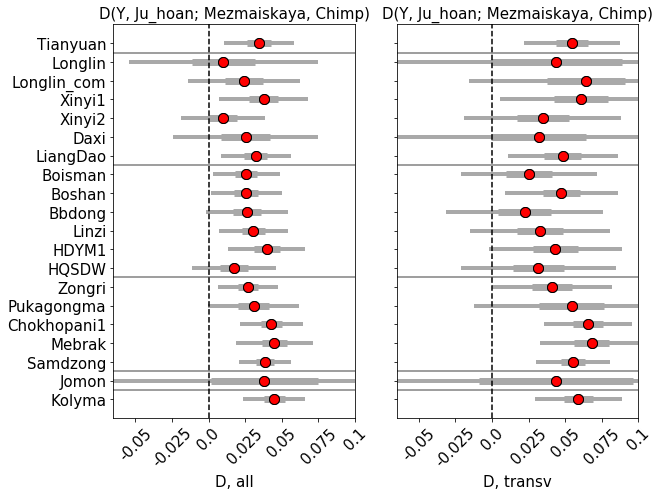

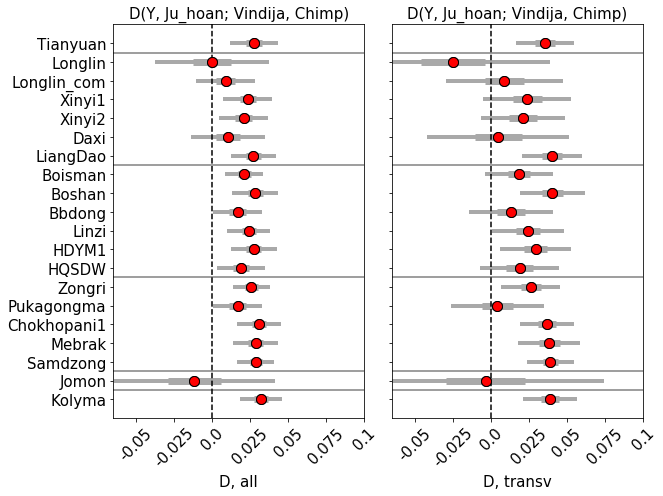

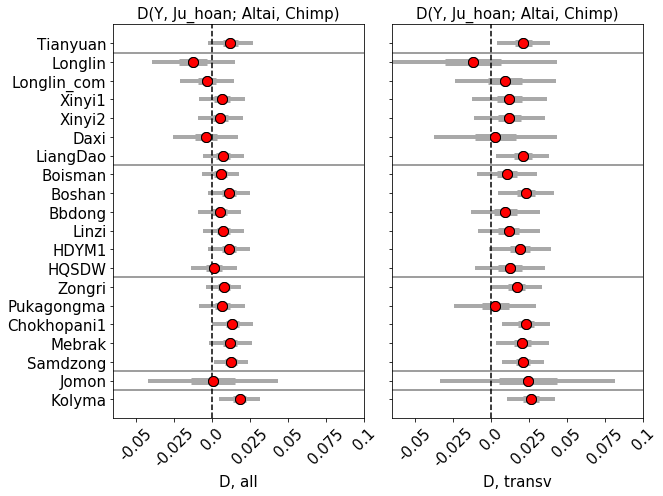

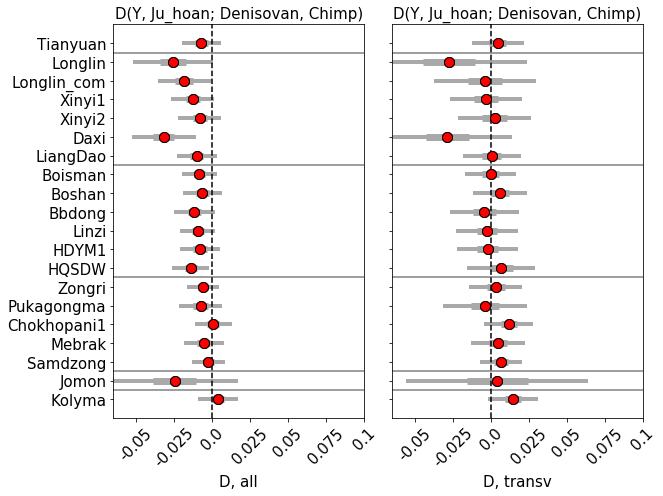

In [4]:
#%%writefile /mnt/solexa/mel_yang/2.2_neolithic/Dstats/UPA9/makeDfig_EUP.py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import matplotlib.patches as mpatches
import plotting_funcs as pf
import sys



pD = "/mnt/solexa/mel_yang/2.2_neolithic/Dstats/UPA9/"
fh="UPA_all9"

easpops=["Oroqen","Daur","Hezhen","Xibo","Japanese","Korean",
        "Tu","Han","Tujia","Miao","Yi","She","Naxi","Atayal",
        "Ami","Lahu","Dai","Kinh","Burmese","Thai","Cambodian",
     "Kostenki14","Vestonice16","French","Sardinian"] ##BY LATITUDE
easpops=["Tianyuan",'Longlin','Longlin_com','Xinyi',
        'Xinyi_other','Daxi','LiangDaoChineseNeolithic','Boisman_MN',
        'BoshanChineseNeolithic','Bbdong','Linzi','HDYM1','HQSDW',
        'Zongri','Pukagongma','Chokhopani1','Mebrak','Samdzong','Jomon','Kolyma_River']
namers = []
wantedpops = namers[::-1]+easpops[::-1]
wantedcolors = ['blue']*len(namers)+['red']*len(easpops)
#wantedpops[-1] = 'Tianyuan'
mynames=["Tianyuan",'Longlin','Longlin_com','Xinyi1','Xinyi2','Daxi','LiangDao','Boisman',
        'Boshan','Bbdong','Linzi','HDYM1','HQSDW','Zongri','Pukagongma','Chokhopani1',
         'Mebrak','Samdzong','Jomon','Kolyma'][::-1]
#mynames[mynames.index('Clovis')]='Anzick-1'
#mynames[mynames.index('TY')]='Tianyuan'

outs=["Chimp","Chimp"]
tvs=["all","transv"]
fixedpop="Natufian" #sys.argv[1]
#for fixedpop in ["Kostenki14","Vestonice16","GoyetQ116-1","Sunghir","Natufian"]:
for fixedpop in ["Mezmaiskaya","Vindija","Altai","Denisovan"]:
    mysets=["ASN_AFR_%s_%s" % (fixedpop,out) for out in outs]

    mytwoeurs = [['Ju_hoan_North'],] #[[sys.argv[2],]] #
    for myeurs in mytwoeurs:
        fig = plt.figure(figsize=(13,7))
        for mysetind,myset in enumerate(mysets):
            #myset = "aEAS_ASN_Natufian_%s" % out
            tv=tvs[mysetind]
            colors = ['red','blue','brown','black','orange']

            myxmins = [-0.065]*len(myeurs)
            myxmaxs = [0.1]*len(myeurs)

            for mysubplot,myeur in enumerate(myeurs):
                myeurname=myeur
                if myeur=="LiangDaoChineseNeolithic": myeurname="LiangDao"
                elif myeur=="BoshanChineseNeolithic": myeurname="Boshan"
                elif myeur=="Xinyi_other": myeurname="Xinyi2"
                elif myeur=="Longlin_com": myeurname="Longlin2"
                elif myeur=="Boisman_MN": myeurname="Boisman"
                elif myeur=="Jomon": myeurname="Sanheyi"
                elif myeur=="Khomani_San": myeurname="San"  
                elif myeur=="Ju_hoan_North": myeurname="Ju_hoan"
                ax1=fig.add_subplot(1,3,mysetind+1)
                mylabel="D(Y, %s; %s, %s)" % (myeurname,fixedpop,outs[mysetind])    
                mycond = True if 'tp' in myset else False

                myZary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+tv+"."+myset+'.Zmat',mycond)
                myDary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+tv+"."+myset+'.Dmat',mycond)
                myDary=myDary
                mySEary=myDary/myZary

                goodpops2 = [mypops2.index(i) for i in wantedpops]
                goodpops1 = mypops1.index(myeur)

                myys = np.array(range(len(goodpops2)))
                tyD = myDary[goodpops2,goodpops1]
                tySE = mySEary[goodpops2,goodpops1]
                for i in range(len(wantedpops)):
                    #print tyD[i]
                    ax1.errorbar(tyD[i],myys[i],xerr=tySE[i],color=wantedcolors[i],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
                    ax1.errorbar(tyD[i],myys[i],xerr=3*tySE[i],color=wantedcolors[i],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
                    ax1.plot(tyD[i],myys[i],'.')
                ax1.set_yticks(myys) #,rotation=45)
                if mysetind==0:
                    ax1.set_yticklabels(mynames,fontsize=15)
                else: 
                    ax1.set_yticklabels(['']*len(wantedpops),fontsize=15)
                ax1.set_ylim(-1,len(goodpops2))
                ax1.set_xlim(myxmins[mysubplot],myxmaxs[mysubplot])

                xlabel = ax1.get_xticks().tolist()
                ax1.set_xticklabels(xlabel,rotation=45,fontsize=15)

                ax1.set_title(mylabel,fontsize=15)

                ax1.axvline(x=0, ls='dashed', c='black')
                for myline in [0.5,1.5,6.5,12.5,18.5]:
                    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5)

                ax1.set_xlabel("D, %s" % tv,fontsize=15)

            fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=None)
        plt.tight_layout()
        plt.show()
        #plt.savefig(pD+fh+'.Dfig.%s_ARC_%s_Out' % (myeur,fixedpop)+'.png',bbox_inches='tight')
            

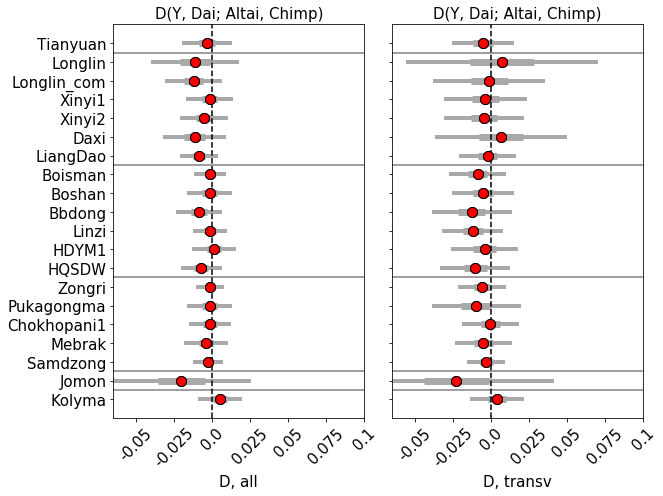

/home/mel_yang/.local/lib/python2.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in divide


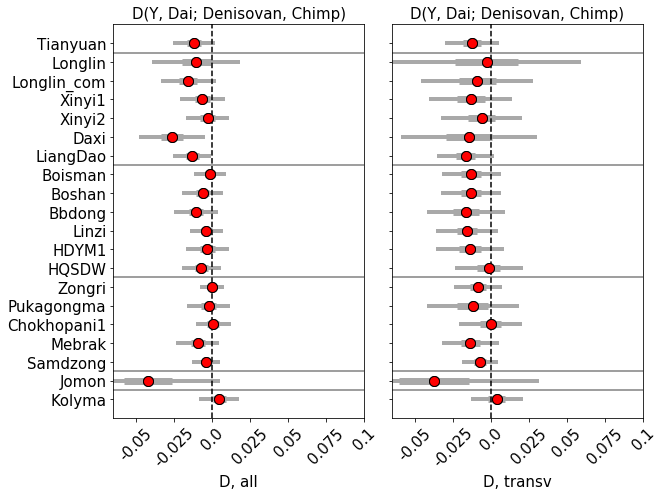

In [6]:
#%%writefile /mnt/solexa/mel_yang/2.2_neolithic/Dstats/UPA9/makeDfig_EUP.py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import matplotlib.patches as mpatches
import plotting_funcs as pf
import sys



pD = "/mnt/solexa/mel_yang/2.2_neolithic/archaicadmix/"
fh="UPA_all9"

easpops=["Oroqen","Daur","Hezhen","Xibo","Japanese","Korean",
        "Tu","Han","Tujia","Miao","Yi","She","Naxi","Atayal",
        "Ami","Lahu","Dai","Kinh","Burmese","Thai","Cambodian",
     "Kostenki14","Vestonice16","French","Sardinian"] ##BY LATITUDE
easpops=["Tianyuan",'Longlin','Longlin_com','Xinyi',
        'Xinyi_other','Daxi','LiangDaoChineseNeolithic','Boisman_MN',
        'BoshanChineseNeolithic','Bbdong','Linzi','HDYM1','HQSDW',
        'Zongri','Pukagongma','Chokhopani1','Mebrak','Samdzong','Jomon','Kolyma_River']
namers = []
wantedpops = namers[::-1]+easpops[::-1]
wantedcolors = ['blue']*len(namers)+['red']*len(easpops)
#wantedpops[-1] = 'Tianyuan'
mynames=["Tianyuan",'Longlin','Longlin_com','Xinyi1','Xinyi2','Daxi','LiangDao','Boisman',
        'Boshan','Bbdong','Linzi','HDYM1','HQSDW','Zongri','Pukagongma','Chokhopani1',
         'Mebrak','Samdzong','Jomon','Kolyma'][::-1]
#mynames[mynames.index('Clovis')]='Anzick-1'
#mynames[mynames.index('TY')]='Tianyuan'

outs=["Chimp","Chimp"]
tvs=["all","transv"]
fixedpop="Natufian" #sys.argv[1]
#for fixedpop in ["Kostenki14","Vestonice16","GoyetQ116-1","Sunghir","Natufian"]:
for fixedpop in ["Altai","Denisovan"]: #["Mezmaiskaya","Vindija","Altai","Denisovan"]:
    mysets=["ASN_ASN_%s_%s" % (fixedpop,out) for out in outs]

    mytwoeurs = [['Dai'],] #[[sys.argv[2],]] #
    for myeurs in mytwoeurs:
        fig = plt.figure(figsize=(13,7))
        for mysetind,myset in enumerate(mysets):
            #myset = "aEAS_ASN_Natufian_%s" % out
            tv=tvs[mysetind]
            colors = ['red','blue','brown','black','orange']

            myxmins = [-0.065]*len(myeurs)
            myxmaxs = [0.1]*len(myeurs)

            for mysubplot,myeur in enumerate(myeurs):
                myeurname=myeur
                if myeur=="LiangDaoChineseNeolithic": myeurname="LiangDao"
                elif myeur=="BoshanChineseNeolithic": myeurname="Boshan"
                elif myeur=="Xinyi_other": myeurname="Xinyi2"
                elif myeur=="Longlin_com": myeurname="Longlin2"
                elif myeur=="Boisman_MN": myeurname="Boisman"
                elif myeur=="Jomon": myeurname="Sanheyi"
                ax1=fig.add_subplot(1,3,mysetind+1)
                if myeurname=="Khomani_San": myneweurname="San"
                else: myneweurname=myeurname
                mylabel="D(Y, %s; %s, %s)" % (myneweurname,fixedpop,outs[mysetind])    
                mycond = True if 'tp' in myset else False

                myZary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+tv+"."+myset+'.Zmat',mycond)
                myDary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+tv+"."+myset+'.Dmat',mycond)
                myDary=myDary
                mySEary=myDary/myZary

                goodpops2 = [mypops2.index(i) for i in wantedpops]
                goodpops1 = mypops1.index(myeur)

                myys = np.array(range(len(goodpops2)))
                tyD = myDary[goodpops2,goodpops1]
                tySE = mySEary[goodpops2,goodpops1]
                for i in range(len(wantedpops)):
                    #print tyD[i]
                    ax1.errorbar(tyD[i],myys[i],xerr=tySE[i],color=wantedcolors[i],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
                    ax1.errorbar(tyD[i],myys[i],xerr=3*tySE[i],color=wantedcolors[i],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
                    ax1.plot(tyD[i],myys[i],'.')
                ax1.set_yticks(myys) #,rotation=45)
                if mysetind==0:
                    ax1.set_yticklabels(mynames,fontsize=15)
                else: 
                    ax1.set_yticklabels(['']*len(wantedpops),fontsize=15)
                ax1.set_ylim(-1,len(goodpops2))
                ax1.set_xlim(myxmins[mysubplot],myxmaxs[mysubplot])

                xlabel = ax1.get_xticks().tolist()
                ax1.set_xticklabels(xlabel,rotation=45,fontsize=15)

                ax1.set_title(mylabel,fontsize=15)

                ax1.axvline(x=0, ls='dashed', c='black')
                for myline in [0.5,1.5,6.5,12.5,18.5]:
                    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5)

                ax1.set_xlabel("D, %s" % tv,fontsize=15)

            fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=None)
        plt.tight_layout()
        plt.show()
        #plt.savefig(pD+fh+'.Dfig.%s_ARC_%s_Out' % (myeur,fixedpop)+'.png',bbox_inches='tight')
            

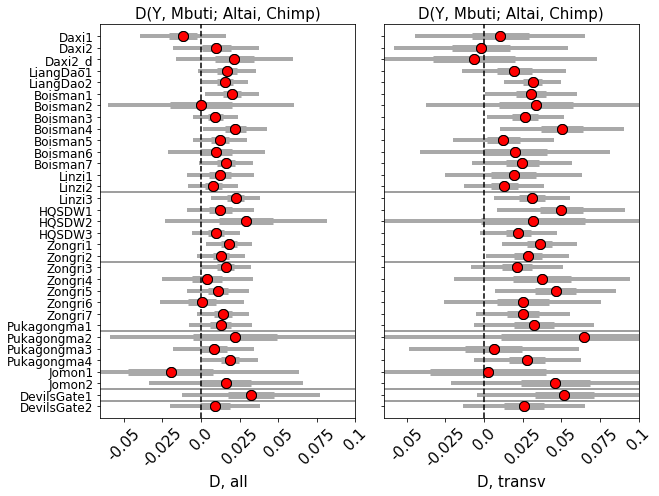

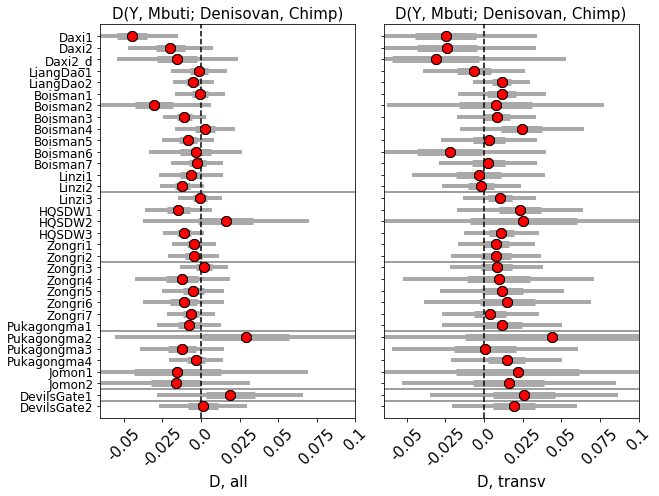

In [1]:
#%%writefile /mnt/solexa/mel_yang/2.2_neolithic/Dstats/UPA9/makeDfig_EUP.py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import matplotlib.patches as mpatches
import plotting_funcs as pf
import sys



pD = "/mnt/solexa/mel_yang/2.2_neolithic/Dstats/UPA9/"
fh="UPA_all9"

easpops=["Oroqen","Daur","Hezhen","Xibo","Japanese","Korean",
        "Tu","Han","Tujia","Miao","Yi","She","Naxi","Atayal",
        "Ami","Lahu","Dai","Kinh","Burmese","Thai","Cambodian",
     "Kostenki14","Vestonice16","French","Sardinian"] ##BY LATITUDE
easpops=['Daxi1','Daxi2','L2039_d','LiangDaoChineseNeolithic1','LiangDaoChineseNeolithic2',
        'Boisman_MN1','Boisman_MN2','Boisman_MN3','Boisman_MN4','Boisman_MN5','Boisman_MN6','Boisman_MN7',
        'Linzi1','Linzi2','Linzi3','HQSDW1','HQSDW2','HQSDW',
        'Zongri1','Zongri2','Zongri3','Zongri4','Zongri5','Zongri6','Zongri7',
        'Pukagongma1','Pukagongma2','Pukagongma3','Pukagongma4','Jomon1','Jomon2','DevilsGate1','DevilsGate2']
namers = []
wantedpops = namers[::-1]+easpops[::-1]
wantedcolors = ['blue']*len(namers)+['red']*len(easpops)
#wantedpops[-1] = 'Tianyuan'
mynames=['Daxi1','Daxi2','Daxi2_d','LiangDao1','LiangDao2',
        'Boisman1','Boisman2','Boisman3','Boisman4','Boisman5','Boisman6','Boisman7',
        'Linzi1','Linzi2','Linzi3','HQSDW1','HQSDW2','HQSDW3',
        'Zongri1','Zongri2','Zongri3','Zongri4','Zongri5','Zongri6','Zongri7',
        'Pukagongma1','Pukagongma2','Pukagongma3','Pukagongma4','Jomon1','Jomon2','DevilsGate1','DevilsGate2'][::-1]
#mynames[mynames.index('Clovis')]='Anzick-1'
#mynames[mynames.index('TY')]='Tianyuan'

outs=["Chimp","Chimp"]
tvs=["all","transv"]
fixedpop="Natufian" #sys.argv[1]
#for fixedpop in ["Kostenki14","Vestonice16","GoyetQ116-1","Sunghir","Natufian"]:
for fixedpop in ["Altai","Denisovan"]: #["Mezmaiskaya","Vindija","Altai","Denisovan"]:
    #mysets=["sepAEAS_AFR_%s_%s" % (fixedpop,out) for out in outs]
    mysets=["sepAEAS_AFR_%s_%s" % (fixedpop,out) for out in outs]
    mytwoeurs = [['Mbuti'],] #[[sys.argv[2],]] #
    for myeurs in mytwoeurs:
        fig = plt.figure(figsize=(13,7))
        for mysetind,myset in enumerate(mysets):
            #myset = "aEAS_ASN_Natufian_%s" % out
            tv=tvs[mysetind]
            colors = ['red','blue','brown','black','orange']

            myxmins = [-0.065]*len(myeurs)
            myxmaxs = [0.1]*len(myeurs)

            for mysubplot,myeur in enumerate(myeurs):
                myeurname=myeur
                if myeur=="LiangDaoChineseNeolithic1": myeurname="LiangDao1"
                elif myeur=="LiangDaoChineseNeolithic2": myeurname="LiangDao2"
                elif myeur=="BoshanChineseNeolithic": myeurname="Boshan"
                elif myeur=="Xinyi_other": myeurname="Xinyi2"
                elif myeur=="Longlin_com": myeurname="Longlin2"
                elif "Boisman_MN" in myeur: myeurname=myeur.replace("Boisman_MN","Boisman")
                elif "Jomon" in myeur: myeurname=myeur.replace("Jomon","Sanheyi")
                ax1=fig.add_subplot(1,3,mysetind+1)
                if myeurname=="Khomani_San": myneweurname="San"
                else: myneweurname=myeurname
                mylabel="D(Y, %s; %s, %s)" % (myneweurname,fixedpop,outs[mysetind])    
                mycond = True if 'tp' in myset else False

                myZary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+tv+"."+myset+'.Zmat',mycond)
                myDary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+tv+"."+myset+'.Dmat',mycond)
                myDary=myDary
                mySEary=myDary/myZary

                goodpops2 = [mypops2.index(i) for i in wantedpops]
                goodpops1 = mypops1.index(myeur)

                myys = np.array(range(len(goodpops2)))
                tyD = myDary[goodpops2,goodpops1]
                tySE = mySEary[goodpops2,goodpops1]
                for i in range(len(wantedpops)):
                    #print tyD[i]
                    ax1.errorbar(tyD[i],myys[i],xerr=tySE[i],color=wantedcolors[i],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
                    ax1.errorbar(tyD[i],myys[i],xerr=3*tySE[i],color=wantedcolors[i],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
                    ax1.plot(tyD[i],myys[i],'.')
                ax1.set_yticks(myys) #,rotation=45)
                if mysetind==0:
                    ax1.set_yticklabels(mynames,fontsize=12)
                else: 
                    ax1.set_yticklabels(['']*len(wantedpops),fontsize=15)
                ax1.set_ylim(-1,len(goodpops2))
                ax1.set_xlim(myxmins[mysubplot],myxmaxs[mysubplot])

                xlabel = ax1.get_xticks().tolist()
                ax1.set_xticklabels(xlabel,rotation=45,fontsize=15)

                ax1.set_title(mylabel,fontsize=15)

                ax1.axvline(x=0, ls='dashed', c='black')
                for myline in [0.5,1.5,6.5,12.5,18.5]:
                    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5)

                ax1.set_xlabel("D, %s" % tv,fontsize=15)

            fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=None)
        plt.tight_layout()
        plt.show()
        #plt.savefig(pD+fh+'.Dfig.%s_ARC_%s_Out' % (myeur,fixedpop)+'.png',bbox_inches='tight')
            

In [ ]:
x='hiii'
print x.replace('h','x')


## Plot f4-ratio for archaic

UPA_all9.f4.all.STAT2_Mbuti 1.54471509076e-06 0.0144398595572
noDaxi			    1.40145362919e-06 0.0011755188067
UPA_all9.f4.all.STAT1_Mbuti 5.32747402011e-07 0.0892717868023
noDaxi			    4.50887792573e-07 0.0396501608939
UPA_all9.f4.all.STAT3_Mbuti -2.78645935376e-06 0.0529769080128
noDaxi			    -2.47048871006e-06 0.0273060235024


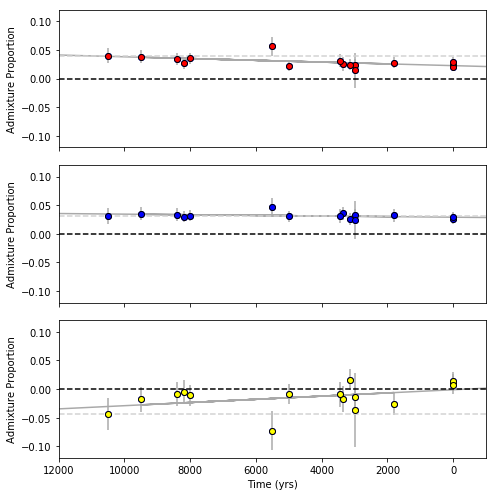

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import matplotlib.patches as mpatches
import plotting_funcs as pf
import scipy.stats

pD = "/mnt/solexa/mel_yang/2.2_neolithic/archaicadmix/"
fig=plt.figure(figsize=(7,7))

varypopind=3
archaicpop=["Vindija","Vindija","Vindija"]
#archaicpop=["Mezmaiskaya","Dinka","Mezmaiskaya"]
archaicpop=["Altai","Vindija","Altai"]
ancientiwant=["Tianyuan",'Longlin','Longlin_com','Xinyi','Xinyi_other','Daxi','LiangDaoChineseNeolithic',
              'Boisman_MN','BoshanChineseNeolithic','Bbdong','Linzi','HDYM1','HQSDW',#"DevilsGate",
              'Chokhopani1','Jomon',"Han","Dai","Ami"]
mytimes=[40000,10450,10550,3350,3450,5500,8000,5000,8200,9500,3000,8400,1800,3150,3000,0,0,0] #7700,3150,3000]

ancientiwant=["UstIshim","Oase1","Kostenki14","GoyetQ116-1","Sunghir","Vestonice16",
              "Malta1","AfontovaGora3","ElMiron","Villabruna","Bichon","Karelia","Loschbour",
              "LaBrana1","Hungarian.KO1","Motala12","Stuttgart","French","Sardinian"]
mytimes=[45000,39000,37000,35000,32000,30000,24000,17000,19000,14000,13500,8500,8000,7800,7700,7600,7000,0,0]

ancientiwant=['Longlin','Longlin_com','Xinyi','Xinyi_other','Daxi','LiangDaoChineseNeolithic',
              'Boisman_MN','BoshanChineseNeolithic','Bbdong','Linzi','HDYM1','HQSDW',#"DevilsGate",
              'Chokhopani1','Jomon',"Han","Dai","Ami"]
mytimes=[10450,10550,3350,3450,5500,8000,5000,8200,9500,3000,8400,1800,3150,3000,0,0,0] #7700,3150,3000]

ancientiwant=['Longlin_com','Xinyi','Xinyi_other','Daxi','LiangDaoChineseNeolithic',
              'Boisman_MN','BoshanChineseNeolithic','Bbdong','Linzi','HDYM1','HQSDW',#"DevilsGate",
              'Chokhopani1','Jomon',"Han","Dai","Ami"]
mytimes=[10500,3350,3450,5500,8000,5000,8200,9500,3000,8400,1800,3150,3000,0,0,0] #7700,3150,3000]


colors=["red","blue","yellow"]
fhs=["UPA_all9.WCAfr.f4.targetAnc_fArc_Dinka","UPA_all9.WCAfr.f4.targetAnc_fAfr_Mez","UPA_all9.f4.targetAnc_3rd"]
fhs=["UPA_all9.WCAfr_sepArchaic.f4.STAT1_Mbuti","UPA_all9.WCAfr.f4.targetAnc_fArc_Dinka","UPA_all9.WCAfr_sepArchaic.f4.STAT3_Mbuti"]
fhs=["UPA_all9.f4.all.STAT2_Mbuti","UPA_all9.f4.all.STAT1_Mbuti","UPA_all9.f4.all.STAT3_Mbuti"]

for fhind,fh in enumerate(fhs):
    
    mydat={ ancientiwant[ind]:[mytimes[ind]] for ind,i in enumerate(ancientiwant) }
    Ds,SEs,pops=[],[],[]
    mylogfile=open(pD+fh+".log",'r')
    for line in mylogfile:
        x=line.split()
        if x[0] != "result:": continue
        if archaicpop[fhind] not in line: continue
        #print x
        if x[varypopind] in mydat: mydat[x[varypopind]]+=[float(x[10]),float(x[11])]
    mylogfile.close()

    xs=mytimes
    if "STAT2" in fh: 
        myDs=[1-mydat[i][1] for i in ancientiwant]
    else: 
        myDs=[mydat[i][1] for i in ancientiwant]
    mySEs=[1.96*mydat[i][2] for i in ancientiwant]
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(xs, myDs)
    yp=[(i*slope)+intercept for i in [50000]+xs+[-2000]]
    df=len(xs)-2
    tstat=slope/std_err
    pval= scipy.stats.t.sf(np.abs(tstat),df)
    print fh,slope, pval

    
    xnoDaxi=[xs[ind] for ind,i in enumerate(xs) if ind not in [3]] #[1,16,17,18] ]
    ynoDaxi=[myDs[ind] for ind,i in enumerate(myDs) if ind not in [3]] #[1,16,17,18] ]
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(xnoDaxi,ynoDaxi)
    df=len(xnoDaxi)-2
    tstat=slope/std_err
    pval= scipy.stats.t.sf(np.abs(tstat),df)
    
    print "noDaxi\t\t\t   ",slope, pval
    
    ax=fig.add_subplot(3,1,fhind+1)
    if fhind<2: 
        for xlabel_i in ax.axes.get_xticklabels(): xlabel_i.set_visible(False)
        #for tick in ax.axes.get_xticklines(): tick.set_visible(False)
    else: ax.set_xlabel("Time (yrs)")
    ax.plot([50000]+xs+[-2000],yp,'-',color='darkgray')

    ax.plot(xs,myDs,'bo',label="aEAS")
    ax.axhline(y=0, ls='dashed', c='black')
    ax.axhline(y=myDs[0], ls='dashed', c='lightgray')
    ax.errorbar(xs,myDs,yerr=mySEs,color=colors[fhind],markeredgecolor="black",ecolor='darkgrey',fmt='o')
    ax.set_xlim((12000,-1000))
    ax.set_ylim((-0.12,0.12))
    ax.set_ylabel("Admixture Proportion")
plt.tight_layout()
plt.show()

f4rat {'Bbdong': [9500, 0.962167, 0.005765], 'Chokhopani1': [3150, 0.975762, 0.005043], 'HQSDW': [1800, 0.972287, 0.005015], 'Boisman_MN': [5000, 0.977365, 0.004506], 'HDYM1': [8400, 0.965525, 0.005371], 'Xinyi_other': [3450, 0.968532, 0.005666], 'BoshanChineseNeolithic': [8200, 0.972323, 0.005169], 'Daxi': [5500, 0.94342, 0.008279], 'LiangDaoChineseNeolithic': [8000, 0.964061, 0.004913], 'Longlin_com': [10500, 0.96015, 0.006804], 'Jomon': [3000, 0.98567, 0.015923], 'Xinyi': [3350, 0.974536, 0.005838], 'Linzi': [3000, 0.975786, 0.004749]}
UPA_all9.f4.all.STAT2_Mbuti 1.80423266123e-06 0.03825289267
noDaxi			    1.83226630143e-06 0.00193301483122

{'Bbdong': [9500, -0.0105, 0.004801], 'Chokhopani1': [3150, -0.0014, 0.003704], 'HQSDW': [1800, -0.0054, 0.004342], 'Boisman_MN': [5000, -0.0021, 0.004002], 'HDYM1': [8400, -0.0066, 0.004491], 'Xinyi_other': [3450, -0.0056, 0.004782], 'BoshanChineseNeolithic': [8200, -0.0042, 0.004316], 'Daxi': [5500, -0.0132, 0.007337], 'LiangDaoChineseNeolith

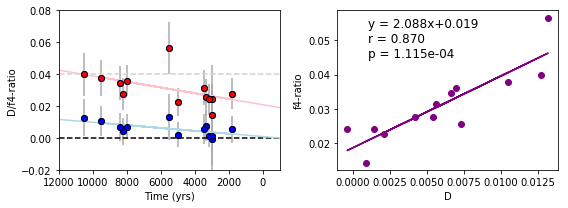

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import matplotlib.patches as mpatches
import plotting_funcs as pf
import scipy.stats

pD = "/mnt/solexa/mel_yang/2.2_neolithic/archaicadmix/"
fig=plt.figure(figsize=(8,3))

varypopind=3
archaicpop=["Altai"]

ancientiwant=['Longlin_com','Xinyi','Xinyi_other','Daxi','LiangDaoChineseNeolithic',
              'Boisman_MN','BoshanChineseNeolithic','Bbdong','Linzi','HDYM1','HQSDW',#"DevilsGate",
              'Chokhopani1','Jomon']
mytimes=[10500,3350,3450,5500,8000,5000,8200,9500,3000,8400,1800,3150,3000] #7700,3150,3000]

#ancientiwant=['Longlin_com','Xinyi','Xinyi_other','LiangDaoChineseNeolithic',
#              'Boisman_MN','BoshanChineseNeolithic','Bbdong','Linzi','HDYM1','HQSDW',#"DevilsGate",
#              'Chokhopani1']
#mytimes=[10500,3350,3450,8000,5000,8200,9500,3000,8400,1800,3150] #7700,3150,3000]


colors=["red","blue","yellow"]
fhs=["UPA_all9.f4.all.STAT2_Mbuti"]
fhind=0
fh=fhs[fhind]


mydat={ ancientiwant[ind]:[mytimes[ind]] for ind,i in enumerate(ancientiwant) }
Ds,SEs,pops=[],[],[]
mylogfile=open(pD+fh+".log",'r')
for line in mylogfile:
    x=line.split()
    if x[0] != "result:": continue
    if archaicpop[fhind] not in line: continue
    #print x
    if x[varypopind] in mydat: mydat[x[varypopind]]+=[float(x[10]),float(x[11])]
mylogfile.close()
print 'f4rat',mydat
xs=mytimes
if "STAT2" in fh: 
    myDs=[1-mydat[i][1] for i in ancientiwant]
else: 
    myDs=[mydat[i][1] for i in ancientiwant]
mySEs=[1.96*mydat[i][2] for i in ancientiwant]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(xs, myDs)
yp=[(i*slope)+intercept for i in [50000]+xs+[-2000]]
df=len(xs)-2
tstat=slope/std_err
pval= scipy.stats.t.sf(np.abs(tstat),df)
print fh,slope, pval


xnoDaxi=[xs[ind] for ind,i in enumerate(xs) if ind not in [3]] #[1,16,17,18] ]
ynoDaxi=[myDs[ind] for ind,i in enumerate(myDs) if ind not in [3]] #[1,16,17,18] ]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(xnoDaxi,ynoDaxi)
df=len(xnoDaxi)-2
tstat=slope/std_err
pval= scipy.stats.t.sf(np.abs(tstat),df)

print "noDaxi\t\t\t   ",slope, pval

ax=fig.add_subplot(1,2,fhind+1)


ax.set_xlabel("Time (yrs)")
ax.plot([50000]+xs+[-2000],yp,'-',color='pink')

ax.plot(xs,myDs,'bo',label="aEAS")
ax.axhline(y=0, ls='dashed', c='black')
ax.axhline(y=myDs[0], ls='dashed', c='lightgray')
ax.errorbar(xs,myDs,yerr=mySEs,color=colors[fhind],markeredgecolor="black",ecolor='darkgrey',fmt='o')
ax.set_xlim((12000,-1000))
ax.set_ylim((-0.02,0.08))
ax.set_ylabel("D/f4-ratio")
f4rat=myDs

##DSTAT
pD = "/mnt/solexa/mel_yang/2.2_neolithic/Dstats/UPA9/"
fh="UPA_all9.D.all.aEAS_ASN_Mbuti_Chimp"
easpop="Ami"
easpop="Mebrak"
varypopind=1
print
mydat={ ancientiwant[ind]:[mytimes[ind]] for ind,i in enumerate(ancientiwant) }
Ds,SEs,pops=[],[],[]
mylogfile=open(pD+fh+".log",'r')
for line in mylogfile:
    x=line.split()
    if x[0] != "result:": continue
    if easpop not in line: continue
    #print x
    if x[varypopind] in mydat: mydat[x[varypopind]]+=[float(x[5]),float(x[6])]
mylogfile.close()
print mydat
xs=mytimes
myDs=[-1*mydat[i][1] for i in ancientiwant]
mySEs=[1.96*mydat[i][2] for i in ancientiwant]

xnoDaxi=[xs[ind] for ind,i in enumerate(xs) if ind not in [3]] #[1,16,17,18] ]
ynoDaxi=[myDs[ind] for ind,i in enumerate(myDs) if ind not in [3]] #[1,16,17,18] ]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(xs, myDs)
yp=[(i*slope)+intercept for i in [50000]+xs+[-2000]]
df=len(xs)-2
tstat=slope/std_err
pval= scipy.stats.t.sf(np.abs(tstat),df)

ax.plot(xs,myDs,'bo',label="aEAS_D")
ax.plot([50000]+xs+[-2000],yp,'-',color='lightblue')
ax.errorbar(xs,myDs,yerr=mySEs,color='blue',markeredgecolor="black",ecolor='darkgrey',fmt='o')


diff=[i-myDs[ind] for ind,i in enumerate(f4rat)]
ax=fig.add_subplot(1,2,2)
ax.plot(myDs,f4rat,'o',color='purple')

##PEARSON'S CORRELATION
from scipy.stats import linregress
(m,b,r,p,e) = linregress(myDs,f4rat)
myfit = np.polyval([m,b],myDs)
ax.plot(myDs,myfit, '-',color='purple')
ax.text(0.001,0.045,"y = %.3fx+%.3f\nr = %.3f\np = %.3e" % (m,b,r,p),fontsize=12)
#ax.text(0.001,0.035,"y = %.3fx+%.3f\nr = %.3f\np = %.3e" % (m,b,r,p),fontsize=12)
ax.set_ylabel("f4-ratio")
ax.set_xlabel("D")
plt.tight_layout()
plt.show()

In [1]:
import scipy

In [ ]:

fig=plt.figure(figsize=(10,7))
for piwind,popiwant in enumerate(["Han","Ami","Cambodian","Daur"]):
    myset="aEAS_ASN_%s_%s" % (fixedpop,out)
    ancientiwant=["Tianyuan",'Longlin','Longlin_com','Xinyi',
            'Xinyi_other','Daxi','LiangDaoChineseNeolithic','Boisman_MN',
            'BoshanChineseNeolithic','Bbdong','Linzi','HDYM1','HQSDW',"DevilsGate",
            'Chokhopani1','Jomon','Kolyma_River']
    mytimes=[40000,10450,10550,3350,3450,5500,8000,5000,8200,9500,3000,8400,1800,
            7700,3150,3000,9800]
    myDary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+tv+myset+'.Dmat','False')
    myZary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+tv+myset+'.Zmat','False')
    mySEary=myDary/myZary
    xs=mytimes
    myDs=[-1*myDary[mypops2.index(popiwant),mypops1.index(i)] for i in ancientiwant]
    mySEs=[1.96*mySEary[mypops2.index(popiwant),mypops1.index(i)] for i in ancientiwant]
    ax=fig.add_subplot(2,2,piwind+1)
    ax.plot(xs,myDs,'bo',label="aEAS")
    ax.axhline(y=0, ls='dashed', c='black')
    ax.errorbar(xs,myDs,yerr=mySEs,color='blue',markeredgecolor="black",ecolor='darkgrey',fmt='o')

    myset="EUP_EAS_%s_%s" % (fixedpop,out)
    ancientiwant=['UstIshim','Oase1','Kostenki14','GoyetQ116-1','Sunghir','Vestonice16','Yana_old','Yana_old2',
                  'Malta1','AfontovaGora3','ElMiron','Villabruna','Bichon','Satsurblia','Kotias','Karelia',
                  'Motala12','Loschbour','LaBrana1','Hungarian.KO1','Stuttgart','French','Sardinian','Natufian']
    #ancientiwant=["Kostenki14"]
    mytimes=[45000,39000,37000,35000,34000,30000,34000,34000,
            24000,16500,18750,14000,13600,13200,9750,8500,
            7600,8000,7800,7600,7100,0,0,10000]
    myDary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+tv+myset+'.Dmat','False')
    myZary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+tv+myset+'.Zmat','False')
    mySEary=myDary/myZary
    print mypops2, mypops1
    xs=mytimes
    myDs=[-1*myDary[mypops2.index(popiwant),mypops1.index(i)] for i in ancientiwant]
    mySEs=[1.96*mySEary[mypops2.index(popiwant),mypops1.index(i)] for i in ancientiwant]
    #fig=plt.figure()
    #ax=fig.add_subplot(1,1,1)
    ax.plot(xs,myDs,'ro',label="aEUR")
    #ax.axhline(y=0, ls='dashed', c='black')
    ax.errorbar(xs,myDs,yerr=mySEs,color='red',markeredgecolor="black",ecolor='darkgrey',fmt='o')
    ax.set_ylim((-0.05,0.06))
    ax.set_xlim((13000,-2000))
    ax.set_title( "D(%s, aEAS/aEUR; %s, %s)" % (popiwant,fixedpop,out) )
    ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

## Plot time_X vs. D(X, Han; Mbuti, Chimp)

['UstIshim', 'Oase1', 'Kostenki14', 'GoyetQ116-1', 'Sunghir', 'Vestonice16', 'Yana_old', 'Yana_old2', 'Malta1', 'AfontovaGora3', 'ElMiron', 'Villabruna', 'Bichon', 'Satsurblia', 'Kotias', 'Karelia', 'Motala12', 'Loschbour', 'LaBrana1', 'Hungarian.KO1', 'Stuttgart', 'French', 'Sardinian', 'Natufian', 'Oroqen', 'Daur', 'Hezhen', 'Xibo', 'Japanese', 'Korean', 'Tu', 'Han', 'Tujia', 'Miao', 'Yi', 'She', 'Naxi', 'Atayal', 'Ami', 'Lahu', 'Dai', 'Kinh', 'Burmese', 'Thai', 'Cambodian', 'Tibetan', 'Uygur'] ['UstIshim', 'Oase1', 'Kostenki14', 'GoyetQ116-1', 'Sunghir', 'Vestonice16', 'Yana_old', 'Yana_old2', 'Malta1', 'AfontovaGora3', 'ElMiron', 'Villabruna', 'Bichon', 'Satsurblia', 'Kotias', 'Karelia', 'Motala12', 'Loschbour', 'LaBrana1', 'Hungarian.KO1', 'Stuttgart', 'French', 'Sardinian', 'Natufian']
['UstIshim', 'Oase1', 'Kostenki14', 'GoyetQ116-1', 'Sunghir', 'Vestonice16', 'Yana_old', 'Yana_old2', 'Malta1', 'AfontovaGora3', 'ElMiron', 'Villabruna', 'Bichon', 'Satsurblia', 'Kotias', 'Karelia'

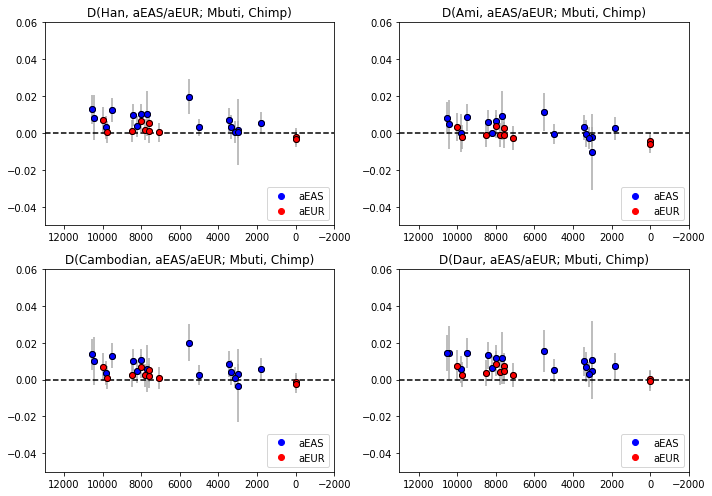

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import matplotlib.patches as mpatches
import plotting_funcs as pf

pD = "/mnt/solexa/mel_yang/2.2_neolithic/Dstats/UPA9/"
fh = "UPA_all9"
out = 'Chimp'
popiwant="Han"
fixedpop="Mbuti"

fig=plt.figure(figsize=(10,7))
for piwind,popiwant in enumerate(["Han","Ami","Cambodian","Daur"]):
    myset="aEAS_ASN_%s_%s" % (fixedpop,out)
    ancientiwant=["Tianyuan",'Longlin','Longlin_com','Xinyi',
            'Xinyi_other','Daxi','LiangDaoChineseNeolithic','Boisman_MN',
            'BoshanChineseNeolithic','Bbdong','Linzi','HDYM1','HQSDW',"DevilsGate",
            'Chokhopani1','Jomon','Kolyma_River']
    mytimes=[40000,10450,10550,3350,3450,5500,8000,5000,8200,9500,3000,8400,1800,
            7700,3150,3000,9800]
    myDary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+tv+myset+'.Dmat','False')
    myZary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+tv+myset+'.Zmat','False')
    mySEary=myDary/myZary
    xs=mytimes
    myDs=[-1*myDary[mypops2.index(popiwant),mypops1.index(i)] for i in ancientiwant]
    mySEs=[1.96*mySEary[mypops2.index(popiwant),mypops1.index(i)] for i in ancientiwant]
    ax=fig.add_subplot(2,2,piwind+1)
    ax.plot(xs,myDs,'bo',label="aEAS")
    ax.axhline(y=0, ls='dashed', c='black')
    ax.errorbar(xs,myDs,yerr=mySEs,color='blue',markeredgecolor="black",ecolor='darkgrey',fmt='o')

    myset="EUP_EAS_%s_%s" % (fixedpop,out)
    ancientiwant=['UstIshim','Oase1','Kostenki14','GoyetQ116-1','Sunghir','Vestonice16','Yana_old','Yana_old2',
                  'Malta1','AfontovaGora3','ElMiron','Villabruna','Bichon','Satsurblia','Kotias','Karelia',
                  'Motala12','Loschbour','LaBrana1','Hungarian.KO1','Stuttgart','French','Sardinian','Natufian']
    #ancientiwant=["Kostenki14"]
    mytimes=[45000,39000,37000,35000,34000,30000,34000,34000,
            24000,16500,18750,14000,13600,13200,9750,8500,
            7600,8000,7800,7600,7100,0,0,10000]
    myDary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+tv+myset+'.Dmat','False')
    myZary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+tv+myset+'.Zmat','False')
    mySEary=myDary/myZary
    print mypops2, mypops1
    xs=mytimes
    myDs=[-1*myDary[mypops2.index(popiwant),mypops1.index(i)] for i in ancientiwant]
    mySEs=[1.96*mySEary[mypops2.index(popiwant),mypops1.index(i)] for i in ancientiwant]
    #fig=plt.figure()
    #ax=fig.add_subplot(1,1,1)
    ax.plot(xs,myDs,'ro',label="aEUR")
    #ax.axhline(y=0, ls='dashed', c='black')
    ax.errorbar(xs,myDs,yerr=mySEs,color='red',markeredgecolor="black",ecolor='darkgrey',fmt='o')
    ax.set_ylim((-0.05,0.06))
    ax.set_xlim((13000,-2000))
    ax.set_title( "D(%s, aEAS/aEUR; %s, %s)" % (popiwant,fixedpop,out) )
    ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

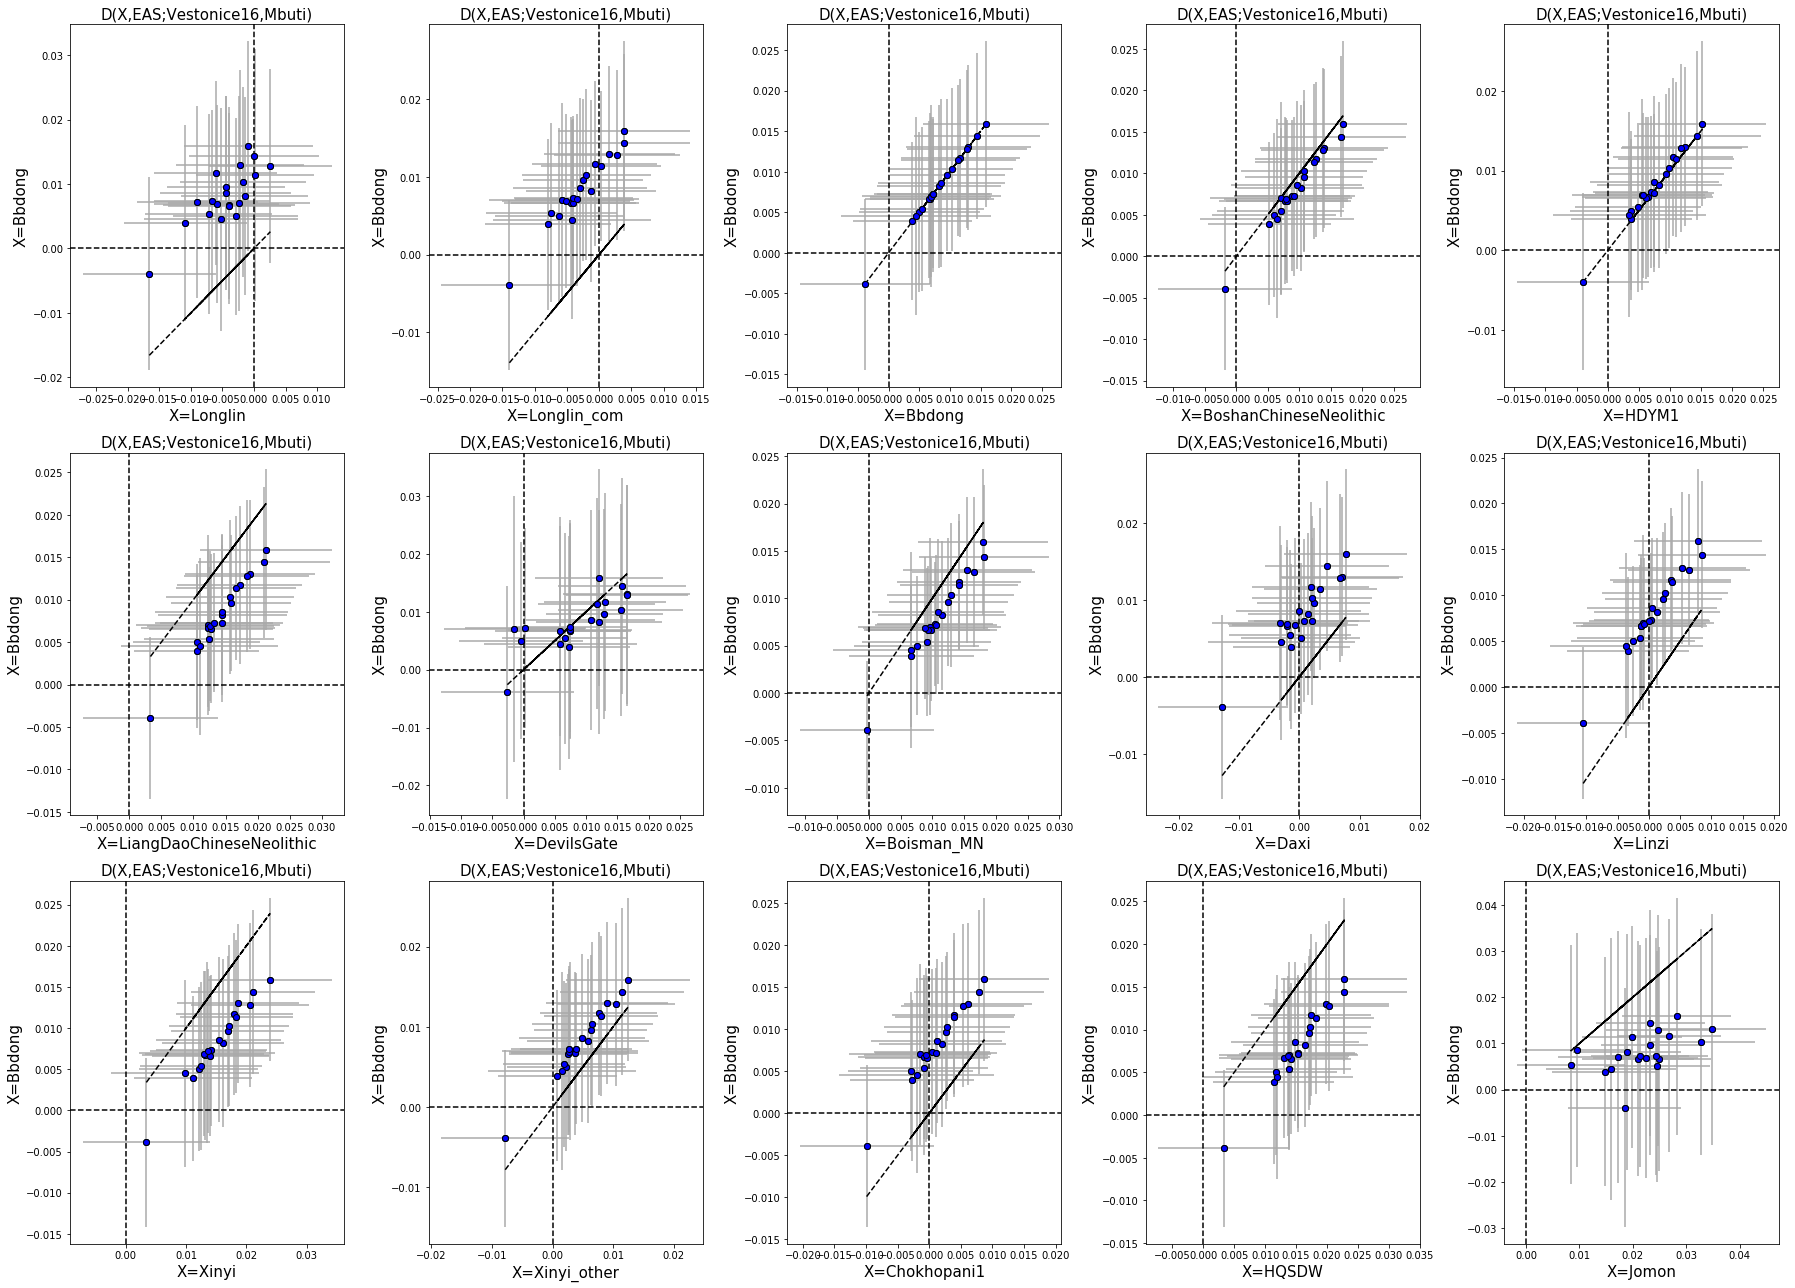

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import matplotlib.patches as mpatches
import plotting_funcs as pf

eas=["Oroqen","Daur","Hezhen","Xibo","Japanese","Korean",
        "Tu","Han","Tujia","Miao","Yi","She","Naxi","Atayal",
        "Ami","Lahu","Dai","Kinh","Burmese","Thai","Cambodian"]
aeas=["Longlin","Longlin_com","Bbdong","BoshanChineseNeolithic","HDYM1",
      "LiangDaoChineseNeolithic","DevilsGate","Boisman_MN",
      "Daxi","Linzi","Xinyi","Xinyi_other","Chokhopani1","HQSDW","Jomon"]
comparingpop=eas
pD = "/mnt/solexa/mel_yang/2.2_neolithic/Dstats/UPA9/"
fh = "UPA_all9"
out = 'Mbuti'
fs=15
fig=plt.figure(figsize=(25,18))
for myind,popiwant1 in enumerate(aeas):
    #popiwant1="Boisman_MN"
    popiwant2="Bbdong"
    fixedpop="Vestonice16"
    myset="aEAS_ASN_%s_%s" % (fixedpop,out)
    tv="all."
    stdco=1.96
    myDary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+tv+myset+'.Dmat','False')
    myZary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+tv+myset+'.Zmat','False')
    mySEary=myDary/myZary
    #xs=mytimes
    myDs1=[myDary[mypops2.index(i),mypops1.index(popiwant1)] for i in comparingpop]
    myDs2=[myDary[mypops2.index(i),mypops1.index(popiwant2)] for i in comparingpop]
    mySEs1=[stdco*mySEary[mypops2.index(i),mypops1.index(popiwant1)] for i in comparingpop]
    mySEs2=[stdco*mySEary[mypops2.index(i),mypops1.index(popiwant2)] for i in comparingpop]

    ax=fig.add_subplot(3,5,myind+1)
    ax.plot(myDs1,myDs1,'-', ls='dashed', c='black')
    ax.plot(myDs1,myDs2,'o')
    
    ax.set_title("D(X,EAS;%s,%s)" % (fixedpop,out),fontsize=fs)
    ax.set_xlabel("X=%s"%popiwant1,fontsize=fs)
    ax.set_ylabel("X=%s"%popiwant2,fontsize=fs)
    ax.axhline(y=0, ls='dashed', c='black')
    ax.axvline(x=0, ls='dashed', c='black')
    ax.errorbar(myDs1,myDs2,yerr=mySEs1,color='blue',markeredgecolor="black",ecolor='darkgrey',fmt='o')
    ax.errorbar(myDs1,myDs2,xerr=mySEs2,color='blue',markeredgecolor="black",ecolor='darkgrey',fmt='o')
plt.tight_layout()
plt.show()

/home/mel_yang/.local/lib/python2.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in divide


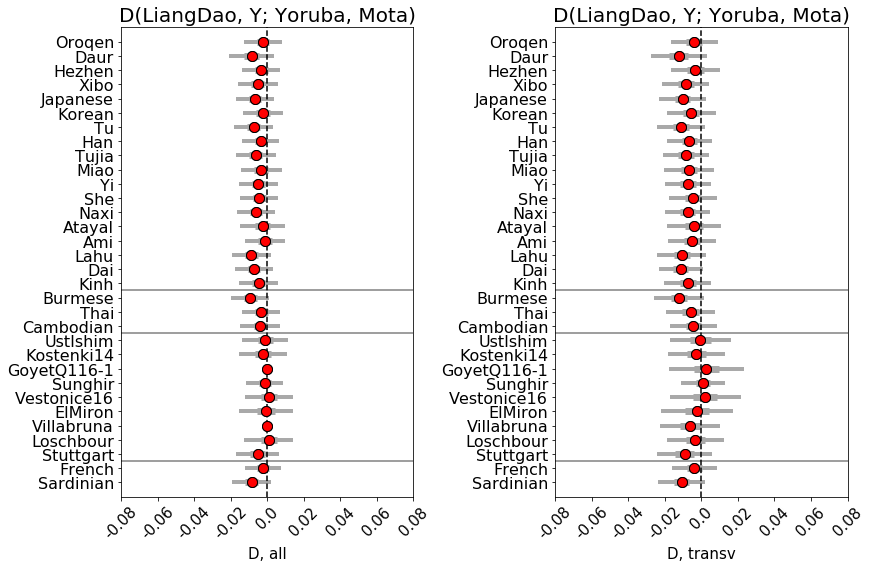

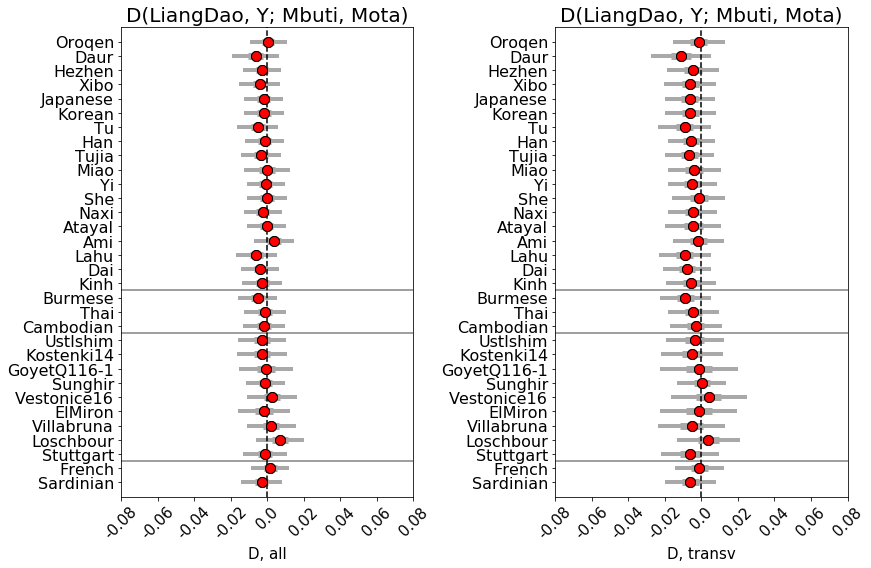

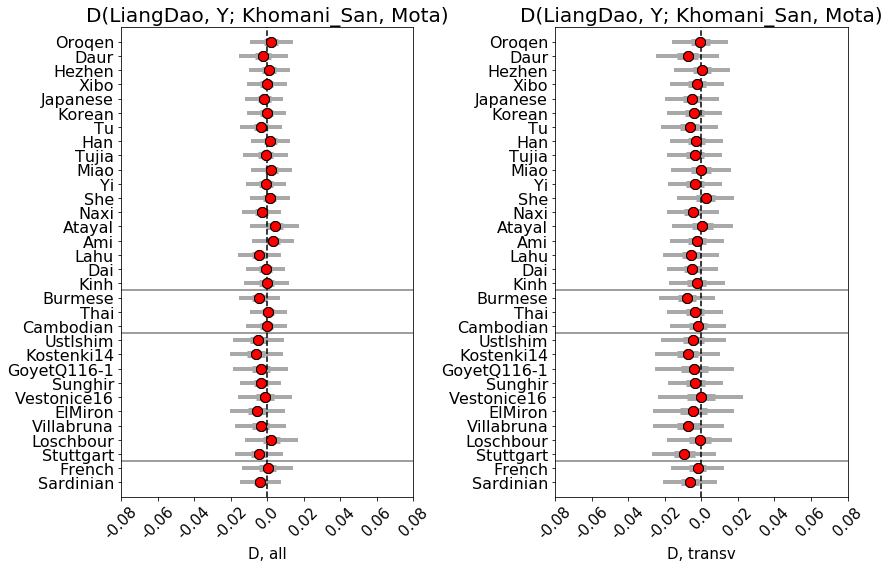

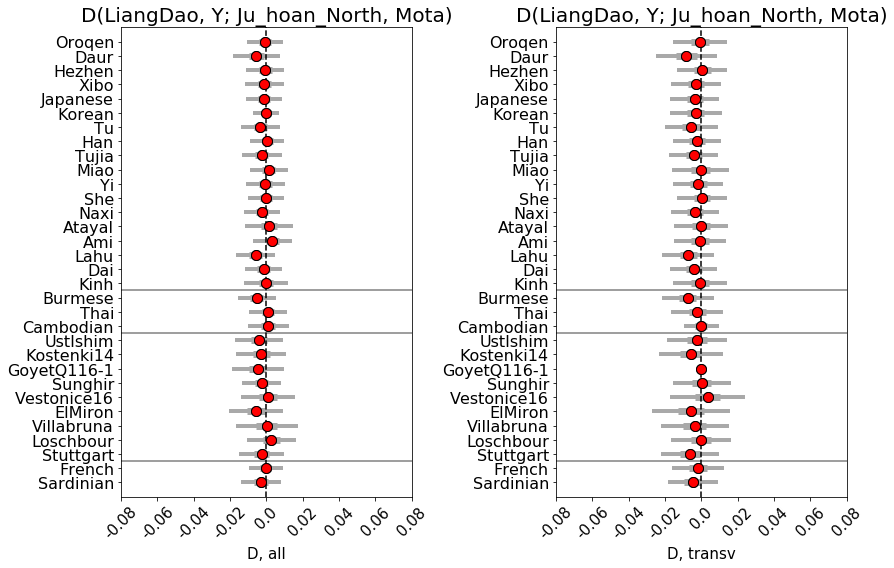

In [156]:
#%%writefile /mnt/solexa/mel_yang/2.2_neolithic/Dstats/UPA9/makeDfig_EUP.py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import matplotlib.patches as mpatches
import plotting_funcs as pf
import sys



pD = "/mnt/solexa/mel_yang/2.2_neolithic/Dstats/UPA9/"
fhs = ["UPA_all9"]
outs = ['Mbuti']

easpops=["Oroqen","Daur","Hezhen","Xibo","Japanese","Korean",
        "Tu","Han","Tujia","Miao","Yi","She","Naxi","Atayal",
        "Ami","Lahu","Dai","Kinh","Burmese","Thai","Cambodian",
     "UstIshim","Kostenki14","GoyetQ116-1","Sunghir","Vestonice16",
         "ElMiron","Villabruna","Loschbour","Stuttgart","French","Sardinian"] ##BY LATITUDE
namers = []
wantedpops = namers[::-1]+easpops[::-1]
wantedcolors = ['blue']*len(namers)+['red']*len(easpops)
#wantedpops[-1] = 'Tianyuan'
mynames=wantedpops[:]
#mynames[mynames.index('Clovis')]='Anzick-1'
#mynames[mynames.index('TY')]='Tianyuan'
fh="UPA_all9"
tv="transv"
outs=["Mbuti","Mbuti","Chimp"]
tvs=["all","transv","all"]
outs=["Chimp","Chimp"]
outs=["Mota","Mota"]
tvs=["all","transv"]
fixedpop="Mbuti" #sys.argv[1]
#for fixedpop in ["Kostenki14","Vestonice16","GoyetQ116-1","Sunghir","Natufian"]:
for fixedpop in ["Yoruba","Mbuti","Khomani_San","Ju_hoan_North"]: #"Mota",
    mysets=["aEAS_ASN_%s_%s" % (fixedpop,out) for out in outs]

    mytwoeurs = [['LiangDaoChineseNeolithic'],] #[[sys.argv[2],]] #
    for myeurs in mytwoeurs:
        fig = plt.figure(figsize=(18,8))
        for mysetind,myset in enumerate(mysets):
            #myset = "aEAS_ASN_Natufian_%s" % out
            tv=tvs[mysetind]
            colors = ['red','blue','brown','black','orange']

            myxmins = [-0.08]*len(myeurs)
            myxmaxs = [0.08]*len(myeurs)

            for mysubplot,myeur in enumerate(myeurs):
                myeurname=myeur
                if myeur=="LiangDaoChineseNeolithic": myeurname="LiangDao"
                elif myeur=="BoshanChineseNeolithic": myeurname="Boshan"
                elif myeur=="Xinyi_other": myeurname="Xinyi2"
                elif myeur=="Longlin_com": myeurname="Longlin2"
                elif myeur=="Boisman_MN": myeurname="Boisman"
                elif myeur=="Jomon": myeurname="Sanheyi"
                ax1=fig.add_subplot(1,3,mysetind+1)
                mylabel="D(%s, Y; %s, %s)" % (myeurname,fixedpop,outs[mysetind])    
                mycond = True if 'tp' in myset else False

                myZary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+tv+"."+myset+'.Zmat',mycond)
                myDary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+tv+"."+myset+'.Dmat',mycond)
                myDary=myDary
                mySEary=myDary/myZary

                goodpops2 = [mypops2.index(i) for i in wantedpops]
                goodpops1 = mypops1.index(myeur)

                myys = np.array(range(len(goodpops2)))
                tyD = myDary[goodpops2,goodpops1]
                tySE = mySEary[goodpops2,goodpops1]
                for i in range(len(wantedpops)):
                    #print tyD[i]
                    ax1.errorbar(tyD[i],myys[i],xerr=tySE[i],color=wantedcolors[i],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
                    ax1.errorbar(tyD[i],myys[i],xerr=3*tySE[i],color=wantedcolors[i],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
                    ax1.plot(tyD[i],myys[i],'.')
                ax1.set_yticks(myys) #,rotation=45)
                if mysubplot==0:
                    ax1.set_yticklabels(mynames,fontsize=16)
                else: 
                    ax1.set_yticklabels(['']*len(wantedpops),fontsize=17)
                ax1.set_ylim(-1,len(goodpops2))
                ax1.set_xlim(myxmins[mysubplot],myxmaxs[mysubplot])

                xlabel = ax1.get_xticks().tolist()
                ax1.set_xticklabels(xlabel,rotation=45,fontsize=15)

                ax1.set_title(mylabel,fontsize=20)

                ax1.axvline(x=0, ls='dashed', c='black')
                for myline in [13.5,10.5,1.5]:
                    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5)

                ax1.set_xlabel("D, %s" % tv,fontsize=15)

            fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=None)
        plt.tight_layout()
        plt.savefig(pD+fh+'.Dfig.%s_EAS_%s_Out' % (myeur,fixedpop)+'.png',bbox_inches='tight')
            

In [14]:
#%%writefile /mnt/solexa/mel_yang/2.2_neolithic/Dstats/UPA9/makeDfig_EUP.py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import matplotlib.patches as mpatches
import plotting_funcs as pf
import sys



pD = "/mnt/solexa/mel_yang/2.2_neolithic/Dstats/UPA9/"
fhs = ["UPA_all9"]
outs = ['Mbuti']

easpops=["Tianyuan",'Longlin','Longlin_com','Daxi','Xinyi',
        'Xinyi_other','LiangDaoChineseNeolithic','Boisman_MN',
        'BoshanChineseNeolithic','Bbdong','Linzi','HDYM1','HQSDW',"DevilsGate",
        'Zongri','Pukagongma','Chokhopani1','Mebrak','Samdzong','Jomon','Kolyma_River']
namers = []
wantedpops = namers[::-1]+easpops[::-1]
wantedcolors = ['blue']*len(namers)+['red']*len(easpops)
#wantedpops[-1] = 'Tianyuan'
mynames=wantedpops[:]
#mynames[mynames.index('Clovis')]='Anzick-1'
#mynames[mynames.index('TY')]='Tianyuan'
fh="UPA_all9"
tv="transv"
outs=["Mbuti","Mbuti","Chimp"]
tvs=["all","transv","all"]
fixedpop="Loschbour" #sys.argv[1]
#for fixedpop in ["Kostenki14","Vestonice16","GoyetQ116-1","Sunghir","Natufian"]:
for fixedpop in ["UstIshim","Kostenki14","GoyetQ116-1","Sunghir","Vestonice16","ElMiron",
                 "Villabruna","Loschbour","French","Malta1"]:
                 #"Villabruna","Bichon","Loschbour","LaBrana1","Hungarian.KO1",
                 #"Satsurblia","Malta1","French","Sardinian"]: #"Mota",
    mysets=["aEAS_ASN_%s_%s" % (fixedpop,out) for out in outs]
    fig = plt.figure(figsize=(14,8))
    mytwoeurs = [['Han'],] #[[sys.argv[2],]] #
    for myeurs in mytwoeurs:
        
        for mysetind,myset in enumerate(mysets):
            #myset = "aEAS_ASN_Natufian_%s" % out
            tv=tvs[mysetind]
            colors = ['red','blue','brown','black','orange']

            myxmins = [-0.08]*len(myeurs)
            myxmaxs = [0.08]*len(myeurs)

            for mysubplot,myeur in enumerate(myeurs):
                myeurname=myeur
                if myeur=="LiangDaoChineseNeolithic": myeurname="LiangDao"
                elif myeur=="BoshanChineseNeolithic": myeurname="Boshan"
                elif myeur=="Xinyi_other": myeurname="Xinyi2"
                elif myeur=="Longlin_com": myeurname="Longlin2"
                elif myeur=="Boisman_MN": myeurname="Boisman"
                elif myeur=="Jomon": myeurname="Sanheyi"
                ax1=fig.add_subplot(1,3,mysetind+1)
                mylabel="D(Y, %s; %s, %s)" % (myeurname,fixedpop,outs[mysetind])    
                mycond = True if 'tp' in myset else False

                myZary,mypops2,mypops1 = pf.mkDZary(pD+fh+".D."+tv+"."+myset+'.Zmat',mycond)
                myDary,mypops2,mypops1 = pf.mkDZary(pD+fh+".D."+tv+"."+myset+'.Dmat',mycond)
                
                myDary=np.transpose(myDary)
                myZary=np.transpose(myZary)
                mySEary=myDary/myZary

                #print mypops1, mypops2
                changename={"LiangDaoChineseNeolithic":"LiangDao","BoshanChineseNeolithic":"Boshan",
                           "Xinyi_other":"Xinyi2","Longlin_com":"Longlin2",
                            "Boisman_MN":"Boisman","Jomon":"Sanheyi"}

                goodpops2 = [mypops2.index(i) for i in wantedpops]
                goodpops2names=[i if i not in changename else changename[i] for i in wantedpops]
                goodpops1 = mypops1.index(myeur)


                myys = np.array(range(len(goodpops2)))
                tyD = myDary[goodpops2,goodpops1]
                tySE = mySEary[goodpops2,goodpops1]
                for i in range(len(wantedpops)):
                    #print tyD[i]
                    ax1.errorbar(tyD[i],myys[i],xerr=tySE[i],color=wantedcolors[i],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
                    ax1.errorbar(tyD[i],myys[i],xerr=3*tySE[i],color=wantedcolors[i],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
                    ax1.plot(tyD[i],myys[i],'.')
                ax1.set_yticks(myys) #,rotation=45)
                if mysetind==0:
                    ax1.set_yticklabels(goodpops2names,fontsize=16)
                else: 
                    ax1.set_yticklabels(['']*len(wantedpops),fontsize=17)
                    
                ax1.set_ylim(-1,len(goodpops2))
                ax1.set_xlim(myxmins[mysubplot],myxmaxs[mysubplot])
                xlabel = ax1.get_xticks().tolist()
                ax1.set_xticklabels(['']*len(xlabel),rotation=45,fontsize=15)
                

                ax1.set_title(mylabel,fontsize=20)

                ax1.axvline(x=0, ls='dashed', c='black')
                for myline in [50,16.5,13.5,6.5,1.5]:
                    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5)

                ax1.set_xlabel("D, %s" % tv,fontsize=15)

            fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=None)
    plt.tight_layout()
    #plt.show() 
    plt.savefig(pD+fh+'.Dfig.aEAS_%s_%s_Out' % (myeur,fixedpop)+'.png',bbox_inches='tight')
          

/home/mel_yang/.local/lib/python2.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in divide


In [ ]:
#%%writefile /mnt/solexa/mel_yang/2.2_neolithic/Dstats/UPA9/makeDfig_EUP.py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import matplotlib.patches as mpatches
import plotting_funcs as pf
import sys



pD = "/mnt/solexa/mel_yang/2.2_neolithic/Dstats/UPA9/"
fhs = ["UPA_all9"]
outs = ['Mbuti']

easpops=["Oroqen","Daur","Hezhen","Xibo","Japanese","Korean",
        "Tu","Han","Tujia","Miao","Yi","She","Naxi","Atayal",
        "Ami","Lahu","Dai","Kinh","Burmese","Thai","Cambodian",
     "UstIshim","Kostenki14","GoyetQ116-1","Sunghir","Vestonice16",
         "ElMiron","Villabruna","Loschbour","Stuttgart","French","Sardinian"] ##BY LATITUDE
namers = []
wantedpops = namers[::-1]+easpops[::-1]
wantedcolors = ['blue']*len(namers)+['red']*len(easpops)
#wantedpops[-1] = 'Tianyuan'
mynames=wantedpops[:]
#mynames[mynames.index('Clovis')]='Anzick-1'
#mynames[mynames.index('TY')]='Tianyuan'
fh="UPA_all9"
tv="transv"
outs=["Mbuti","Mbuti","Chimp"]
tvs=["all","transv","all"]
outs=["Chimp","Chimp"]
outs=["Mota","Mota"]
tvs=["all","transv"]
fixedpop="Loschbour" #sys.argv[1]
#for fixedpop in ["Kostenki14","Vestonice16","GoyetQ116-1","Sunghir","Natufian"]:
for fixedpop in ["Yoruba","Mbuti","Khomani_San","Ju_hoan_North"]: #"Mota",
    mysets=["aEAS_aEAS_%s_%s" % (fixedpop,out) for out in outs]

    mytwoeurs = [['LiangDaoChineseNeolithic'],] #[[sys.argv[2],]] #
    for myeurs in mytwoeurs:
        fig = plt.figure(figsize=(18,8))
        for mysetind,myset in enumerate(mysets):
            #myset = "aEAS_ASN_Natufian_%s" % out
            tv=tvs[mysetind]
            colors = ['red','blue','brown','black','orange']

            myxmins = [-0.08]*len(myeurs)
            myxmaxs = [0.08]*len(myeurs)

            for mysubplot,myeur in enumerate(myeurs):
                myeurname=myeur
                if myeur=="LiangDaoChineseNeolithic": myeurname="LiangDao"
                elif myeur=="BoshanChineseNeolithic": myeurname="Boshan"
                elif myeur=="Xinyi_other": myeurname="Xinyi2"
                elif myeur=="Longlin_com": myeurname="Longlin2"
                elif myeur=="Boisman_MN": myeurname="Boisman"
                elif myeur=="Jomon": myeurname="Sanheyi"
                ax1=fig.add_subplot(1,3,mysetind+1)
                mylabel="D(%s, Y; %s, %s)" % (myeurname,fixedpop,outs[mysetind])    
                mycond = True if 'tp' in myset else False

                myZary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+tv+"."+myset+'.Zmat',mycond)
                myDary,mypops1,mypops2 = pf.mkDZary(pD+fh+".D."+tv+"."+myset+'.Dmat',mycond)
                myDary=myDary
                mySEary=myDary/myZary

                goodpops2 = [mypops2.index(i) for i in wantedpops]
                goodpops1 = mypops1.index(myeur)

                myys = np.array(range(len(goodpops2)))
                tyD = myDary[goodpops2,goodpops1]
                tySE = mySEary[goodpops2,goodpops1]
                for i in range(len(wantedpops)):
                    #print tyD[i]
                    ax1.errorbar(tyD[i],myys[i],xerr=tySE[i],color=wantedcolors[i],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
                    ax1.errorbar(tyD[i],myys[i],xerr=3*tySE[i],color=wantedcolors[i],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
                    ax1.plot(tyD[i],myys[i],'.')
                ax1.set_yticks(myys) #,rotation=45)
                if mysubplot==0:
                    ax1.set_yticklabels(mynames,fontsize=16)
                else: 
                    ax1.set_yticklabels(['']*len(wantedpops),fontsize=17)
                ax1.set_ylim(-1,len(goodpops2))
                ax1.set_xlim(myxmins[mysubplot],myxmaxs[mysubplot])

                xlabel = ax1.get_xticks().tolist()
                ax1.set_xticklabels(xlabel,rotation=45,fontsize=15)

                ax1.set_title(mylabel,fontsize=20)

                ax1.axvline(x=0, ls='dashed', c='black')
                for myline in [13.5,10.5,1.5]:
                    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5)

                ax1.set_xlabel("D, %s" % tv,fontsize=15)

            fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=None)
        plt.tight_layout()
        plt.savefig(pD+fh+'.Dfig.%s_EAS_%s_Out' % (myeur,fixedpop)+'.png',bbox_inches='tight')
            